# E-commerce sales and customer behaviour analysis

# 1. importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. loading the dataset

In [4]:
df = pd.read_csv(r"C:\Users\shiva\Downloads\data.csv", encoding = 'ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 3. number of rows and columns

In [5]:
df.shape

(541909, 8)

# 4. columns and data types

In [6]:
df_cols_dtype = pd.DataFrame(df.dtypes)
df_cols_dtype

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [7]:
df1_trans = df_cols_dtype.T
df1_trans

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,object,object,object,int64,object,float64,float64,object


In [8]:
df1 = df1_trans.rename(index = {0 : 'Column Type'})
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Column Type,object,object,object,int64,object,float64,float64,object


# 5. columns and data types & checking missing values

In [9]:
df_cols_nans = pd.DataFrame(df.isnull().sum())
df_cols_nans

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [10]:
df2_trans = df_cols_nans.T
df2_trans

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,0,1454,0,0,0,135080,0


In [11]:
df2 = df2_trans.rename(index= {0 : 'Missing Values' })
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Missing Values,0,0,1454,0,0,0,135080,0


In [12]:
df_col_types_nans = pd.concat([df1, df2])
df_col_types_nans

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Column Type,object,object,object,int64,object,float64,float64,object
Missing Values,0,0,1454,0,0,0,135080,0


# 6. columns and data types & checking missing values, % wise

In [13]:
df_cols_nans_per = pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
df_cols_nans_per

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


In [14]:
df3_trans = df_cols_nans_per.T
df3_trans


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


In [15]:
df3 = df3_trans.rename(index = {0 : 'Missing vlaues (%)' })
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Missing vlaues (%),0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


In [16]:
result1 = pd.concat([df_col_types_nans, df3])
result1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Column Type,object,object,object,int64,object,float64,float64,object
Missing Values,0,0,1454,0,0,0,135080,0
Missing vlaues (%),0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


# 7. dropping missing values

In [17]:
df.dropna(axis = 0, inplace = True)
df.shape

(406829, 8)

# 8. columns and data types & checking missing values,% wise

In [18]:
df_cols_nans = pd.DataFrame(df.isnull().sum())
df2_trans = df_cols_nans.T

df2 = df2_trans.rename(index= {0 : 'Missing Values' })
df_col_types_nans = pd.concat([df1, df2])

df_cols_nans_per = pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
df3_trans = df_cols_nans_per.T

df3 = df3_trans.rename(index = {0 : 'Missing vlaues (%)' })
result2 = pd.concat([df_col_types_nans, df3])
result2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Column Type,object,object,object,int64,object,float64,float64,object
Missing Values,0,0,0,0,0,0,0,0
Missing vlaues (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 9. checking the duplicates

In [19]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 406829, dtype: bool

In [20]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [21]:
df.duplicated().sum()

np.int64(5225)

# 10. orders and countries or unique countries

In [22]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [23]:
len(df.Country.unique())

37

# 11. number of order per country

In [24]:
temp = df[['CustomerID', 'InvoiceNo', 'Country']]
temp

,CustomerID,InvoiceNo,Country
0,17850.0,536365,United Kingdom
1,17850.0,536365,United Kingdom
2,17850.0,536365,United Kingdom
3,17850.0,536365,United Kingdom
4,17850.0,536365,United Kingdom
...,...,...,...
541904,12680.0,581587,France
541905,12680.0,581587,France
541906,12680.0,581587,France
541907,12680.0,581587,France


In [25]:
temp = temp.groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp

Empty DataFrame
Columns: []
Index: [(12346.0, 541431, United Kingdom), (12346.0, C541433, United Kingdom), (12347.0, 537626, Iceland), (12347.0, 542237, Iceland), (12347.0, 549222, Iceland), (12347.0, 556201, Iceland), (12347.0, 562032, Iceland), (12347.0, 573511, Iceland), (12347.0, 581180, Iceland), (12348.0, 539318, Finland), (12348.0, 541998, Finland), (12348.0, 548955, Finland), (12348.0, 568172, Finland), (12349.0, 577609, Italy), (12350.0, 543037, Norway), (12352.0, 544156, Norway), (12352.0, 545323, Norway), (12352.0, 545332, Norway), (12352.0, 546869, Norway), (12352.0, 547390, Norway), (12352.0, 567505, Norway), (12352.0, 568699, Norway), (12352.0, 574275, Norway), (12352.0, C545329, Norway), (12352.0, C545330, Norway), (12352.0, C547388, Norway), (12353.0, 553900, Bahrain), (12354.0, 550911, Spain), (12355.0, 552449, Bahrain), (12356.0, 541430, Portugal), (12356.0, 549435, Portugal), (12356.0, 576895, Portugal), (12357.0, 574740, Switzerland), (12358.0, 559707, Austria), (12358.0, 581232, Austria), (12359.0, 540946, Cyprus), (12359.0, 543370, Cyprus), (12359.0, 555477, Cyprus), (12359.0, 571034, Cyprus), (12359.0, C549955, Cyprus), (12359.0, C580165, Cyprus), (12360.0, 554132, Austria), (12360.0, 563749, Austria), (12360.0, 571705, Austria), (12361.0, 545017, Belgium), (12362.0, 544203, Belgium), (12362.0, 551346, Belgium), (12362.0, 559295, Belgium), (12362.0, 563037, Belgium), (12362.0, 568651, Belgium), (12362.0, 570667, Belgium), (12362.0, 572887, Belgium), (12362.0, 573173, Belgium), (12362.0, 574329, Belgium), (12362.0, 580979, Belgium), (12362.0, C544902, Belgium), (12362.0, C563752, Belgium), (12362.0, C579178, Belgium), (12363.0, 549687, Unspecified), (12363.0, 563947, Unspecified), (12364.0, 563854, Belgium), (12364.0, 567897, Belgium), (12364.0, 573401, Belgium), (12364.0, 580152, Belgium), (12365.0, 544574, Cyprus), (12365.0, 544578, Cyprus), (12365.0, C544577, Cyprus), (12367.0, 580716, Denmark), (12370.0, 538826, Cyprus), (12370.0, 539330, Austria), (12370.0, 546236, Cyprus), (12370.0, 571905, Cyprus), (12371.0, 570521, Switzerland), (12371.0, 572770, Switzerland), (12372.0, 544157, Denmark), (12372.0, 552731, Denmark), (12372.0, 568872, Denmark), (12373.0, 542887, Austria), (12374.0, 576345, Austria), (12375.0, 565333, Finland), (12375.0, 579281, Finland), (12375.0, C581071, Finland), (12377.0, 539488, Switzerland), (12377.0, 542586, Switzerland), (12378.0, 562046, Switzerland), (12379.0, 557789, Belgium), (12379.0, 567196, Belgium), (12379.0, C559193, Belgium), (12380.0, 555739, Belgium), (12380.0, 567928, Belgium), (12380.0, 571187, Belgium), (12380.0, 577180, Belgium), (12380.0, C572532, Belgium), (12381.0, 563100, Norway), (12381.0, 570681, Norway), (12381.0, 570725, Norway), (12381.0, 574694, Norway), (12381.0, 580638, Norway), (12381.0, C565050, Norway), (12383.0, 539840, Belgium), ...]

[22190 rows x 0 columns]

In [26]:
temp = temp.reset_index(drop = False)
temp

,CustomerID,InvoiceNo,Country
0,12346.0,541431,United Kingdom
1,12346.0,C541433,United Kingdom
2,12347.0,537626,Iceland
3,12347.0,542237,Iceland
4,12347.0,549222,Iceland
...,...,...,...
22185,18283.0,579673,United Kingdom
22186,18283.0,580872,United Kingdom
22187,18287.0,554065,United Kingdom
22188,18287.0,570715,United Kingdom


In [27]:
temp['Country']

0        United Kingdom
1        United Kingdom
2               Iceland
3               Iceland
4               Iceland
              ...      
22185    United Kingdom
22186    United Kingdom
22187    United Kingdom
22188    United Kingdom
22189    United Kingdom
Name: Country, Length: 22190, dtype: object

In [28]:
countries = temp['Country'].value_counts()
countries

Country
United Kingdom          19857
Germany                   603
France                    458
EIRE                      319
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                71
Portugal                   70
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Singapore                  10
Malta                      10
Unspecified                 8
Iceland                     7
USA                         7
Canada                      6
Israel                      6
Greece                      6
European Community          5
Czech Republic              5
Lithuania                   4
United Arab Emirates        3
Bahrain                     2
Sa

# 12. products

In [29]:
products = len(df['StockCode'].value_counts())
products

3684

# 13. transactions

In [30]:
transactions = len(df['InvoiceNo'].value_counts())
transactions

22190

# 14. customers

In [31]:
customers = len(df['CustomerID'].value_counts())
customers

4372

# 15. dataframe: products,transactions,customres

In [32]:
d1 = {'Products': products, 'Transactions': transactions, 'Customers': customers}
d1

{'Products': 3684, 'Transactions': 22190, 'Customers': 4372}

In [33]:
df_pro_txns_cust = pd.DataFrame(d1, index = ['Quantity'])
df_pro_txns_cust

,Products,Transactions,Customers
Quantity,3684,22190,4372


# 16.number of products purchased in every transactions

In [34]:
temp1 = df.groupby(by = ['CustomerID', 'InvoiceNo'], as_index = False)['InvoiceDate'].count()
temp1

,CustomerID,InvoiceNo,InvoiceDate
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
...,...,...,...
22185,18283.0,579673,52
22186,18283.0,580872,50
22187,18287.0,554065,29
22188,18287.0,570715,38


In [35]:
nb_products_per_basket = temp1.rename(columns = {'InvoiceDate' : 'Number of products'})
nb_products_per_basket

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
...,...,...,...
22185,18283.0,579673,52
22186,18283.0,580872,50
22187,18287.0,554065,29
22188,18287.0,570715,38


In [36]:
nb_products_per_basket.sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
1,12346.0,C541433,1
0,12346.0,541431,1
3,12347.0,542237,29
4,12347.0,549222,24
6,12347.0,562032,22
...,...,...,...
22174,18283.0,550957,56
22186,18283.0,580872,50
22188,18287.0,570715,38
22187,18287.0,554065,29


In [37]:
nb_products_per_basket.head().sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24


# 17. count the number of cancelled orders

In [38]:
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x:int('C' in x))
nb_products_per_basket

,CustomerID,InvoiceNo,Number of products,order_canceled
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0
...,...,...,...,...
22185,18283.0,579673,52,0
22186,18283.0,580872,50,0
22187,18287.0,554065,29,0
22188,18287.0,570715,38,0


In [39]:
display(nb_products_per_basket[:5])


,CustomerID,InvoiceNo,Number of products,order_canceled
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0


# 18. number of orders cancelled 

In [40]:
n1 = nb_products_per_basket['order_canceled'].sum()
n1

np.int64(3654)

In [41]:
n2 = nb_products_per_basket.shape[0]
n2

22190

In [42]:
print('Number of orders canceled: {}/{} = ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 3654/22190 = (16.47%) 


# 19. understand quantity negative orders

In [43]:
df_check = df[df['Quantity'] < 0]
df_check = df_check[['CustomerID','Quantity', 'StockCode', 'Description', 'UnitPrice']]
df_check

,CustomerID,Quantity,StockCode,Description,UnitPrice
141,14527.0,-1,D,Discount,27.50
154,15311.0,-1,35004C,SET OF 3 COLOURED FLYING DUCKS,4.65
235,17548.0,-12,22556,PLASTERS IN TIN CIRCUS PARADE,1.65
236,17548.0,-24,21984,PACK OF 12 PINK PAISLEY TISSUES,0.29
237,17548.0,-24,21983,PACK OF 12 BLUE PAISLEY TISSUES,0.29
...,...,...,...,...,...
540449,14397.0,-11,23144,ZINC T-LIGHT HOLDER STARS SMALL,0.83
541541,15498.0,-1,M,Manual,224.69
541715,15311.0,-5,21258,VICTORIAN SEWING BOX LARGE,10.95
541716,17315.0,-1,84978,HANGING HEART JAR T-LIGHT HOLDER,1.25


# 20. recored where description is exact match with discount word

In [44]:
df[df['Description'] == 'Discount']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
9038,C537164,D,Discount,-1,12/5/2010 13:21,29.29,14527.0,United Kingdom
14498,C537597,D,Discount,-1,12/7/2010 12:34,281.00,15498.0,United Kingdom
19392,C537857,D,Discount,-1,12/8/2010 16:00,267.12,17340.0,United Kingdom
31134,C538897,D,Discount,-1,12/15/2010 9:14,5.76,16422.0,United Kingdom
...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,11/18/2011 12:06,19.82,14527.0,United Kingdom
479869,C577227,D,Discount,-1,11/18/2011 12:06,16.76,14527.0,United Kingdom
493613,C578239,D,Discount,-1,11/23/2011 12:29,26.33,14912.0,Italy
516221,C579884,D,Discount,-1,11/30/2011 17:34,20.53,14527.0,United Kingdom


# 21. applying two conditions like df['quality']<0 & df['description']!='discount'

In [45]:
df_check = df[(df['Quantity'] < 0) & (df['Description'] != 'Discount')]
df_check[['CustomerID','Quantity','StockCode', 'Description','UnitPrice']]

,CustomerID,Quantity,StockCode,Description,UnitPrice
154,15311.0,-1,35004C,SET OF 3 COLOURED FLYING DUCKS,4.65
235,17548.0,-12,22556,PLASTERS IN TIN CIRCUS PARADE,1.65
236,17548.0,-24,21984,PACK OF 12 PINK PAISLEY TISSUES,0.29
237,17548.0,-24,21983,PACK OF 12 BLUE PAISLEY TISSUES,0.29
238,17548.0,-24,21980,PACK OF 12 RED RETROSPOT TISSUES,0.29
...,...,...,...,...,...
540449,14397.0,-11,23144,ZINC T-LIGHT HOLDER STARS SMALL,0.83
541541,15498.0,-1,M,Manual,224.69
541715,15311.0,-5,21258,VICTORIAN SEWING BOX LARGE,10.95
541716,17315.0,-1,84978,HANGING HEART JAR T-LIGHT HOLDER,1.25


# 22. understanding stock code column contains special words

In [46]:
list_special_codes = df[df['StockCode'].str.contains('^[a-zA-Z]+', regex = True)]
list_special_codes

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.00,12662.0,Germany
1423,536540,C2,CARRIAGE,1,12/1/2010 14:05,50.00,14911.0,EIRE
...,...,...,...,...,...,...,...,...
541216,581494,POST,POSTAGE,2,12/9/2011 10:13,18.00,12518.0,Germany
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541730,581570,POST,POSTAGE,1,12/9/2011 11:59,18.00,12662.0,Germany
541767,581574,POST,POSTAGE,2,12/9/2011 12:09,18.00,12526.0,Germany


In [47]:
list_special_codes['StockCode'].unique()

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

# Understandings from above result:

POST = POSTAGE

D = Discount

C2 = CARRIAGE

M = Manual

BANK CHARGES = Bank Charges

PADS = PADS TO MATCH ALL CUSHIONS

DOT = DOTCOM POSTAGE

In [55]:
df = pd.read_csv(r"C:\Users\shiva\Downloads\data.csv", encoding = 'ISO-8859-1') 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDateOnly'] = df['InvoiceDate'].dt.date

In [56]:
daily_sales = df.groupby('InvoiceDateOnly')['TotalAmount'].sum()

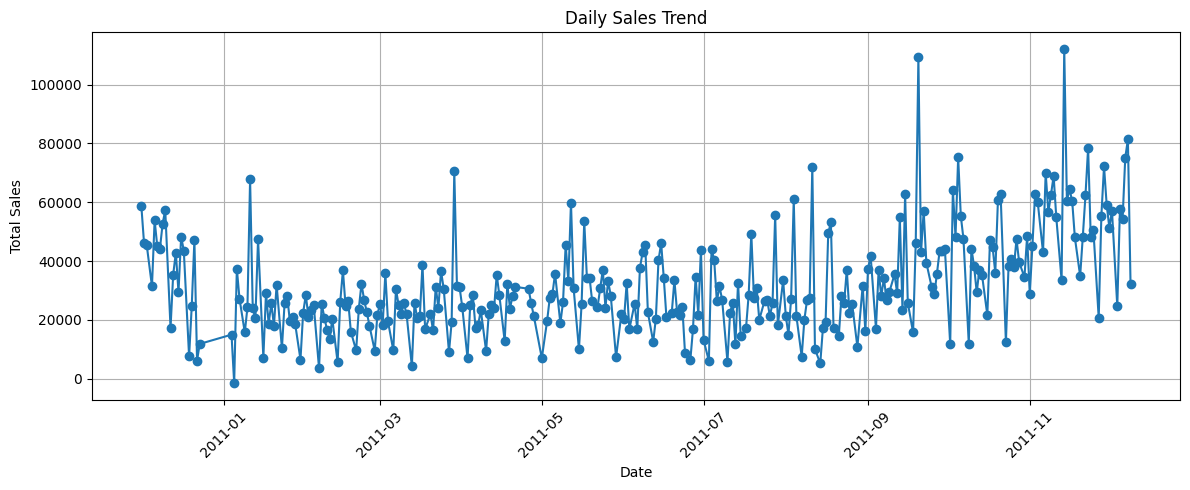

In [57]:
plt.figure(figsize=(12, 5))
plt.plot(daily_sales.index, daily_sales.values, marker='o')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

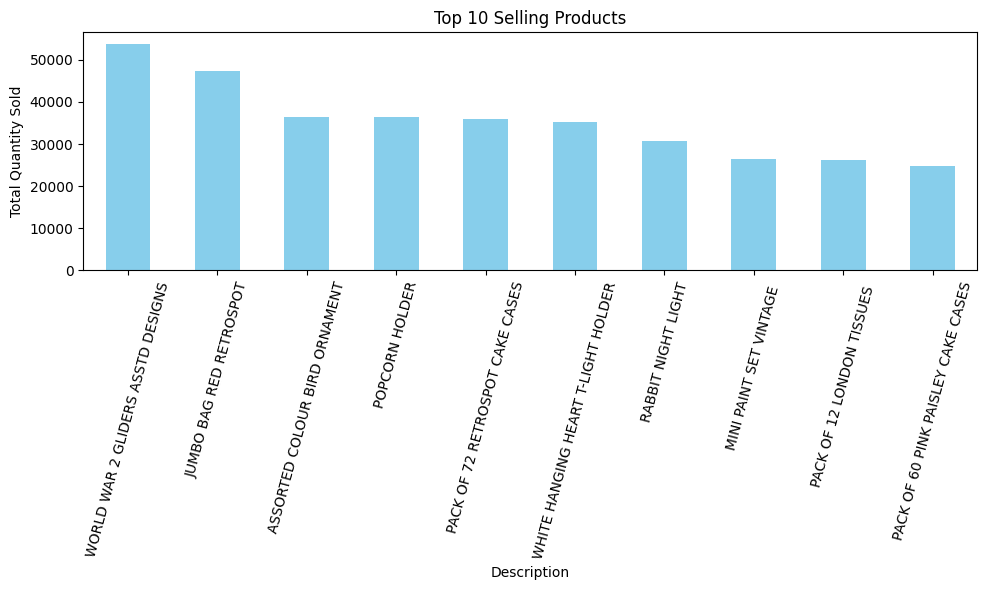

In [58]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Selling Products")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

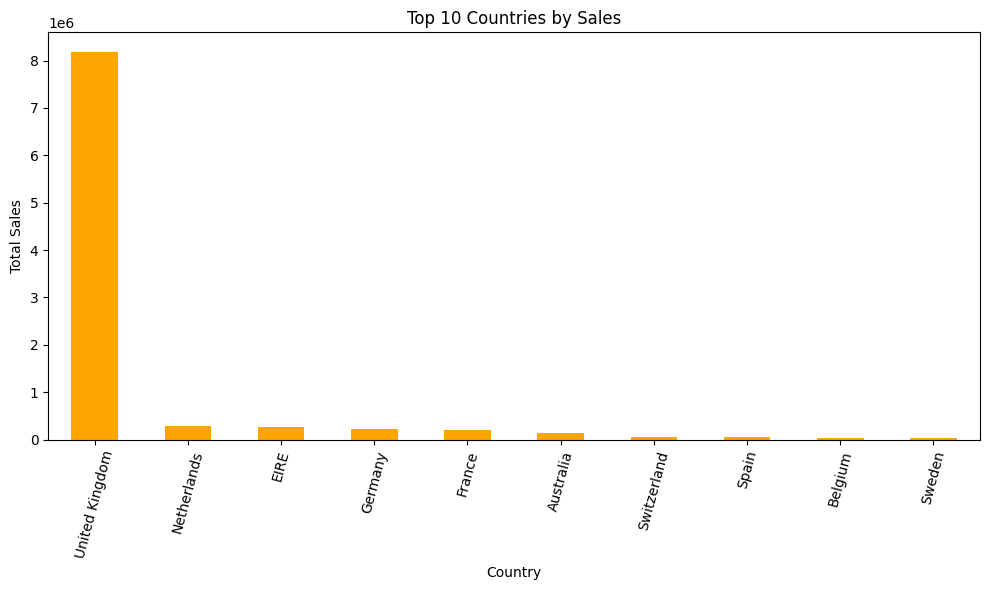

In [59]:
country_sales = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar', color='orange')
plt.title("Top 10 Countries by Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

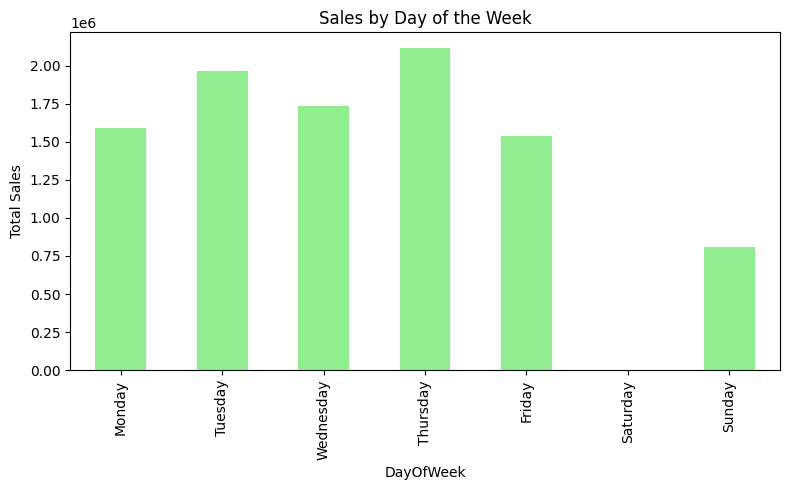

In [60]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
sales_by_day = df.groupby('DayOfWeek')['TotalAmount'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(8, 5))
sales_by_day.plot(kind='bar', color='lightgreen')
plt.title("Sales by Day of the Week")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

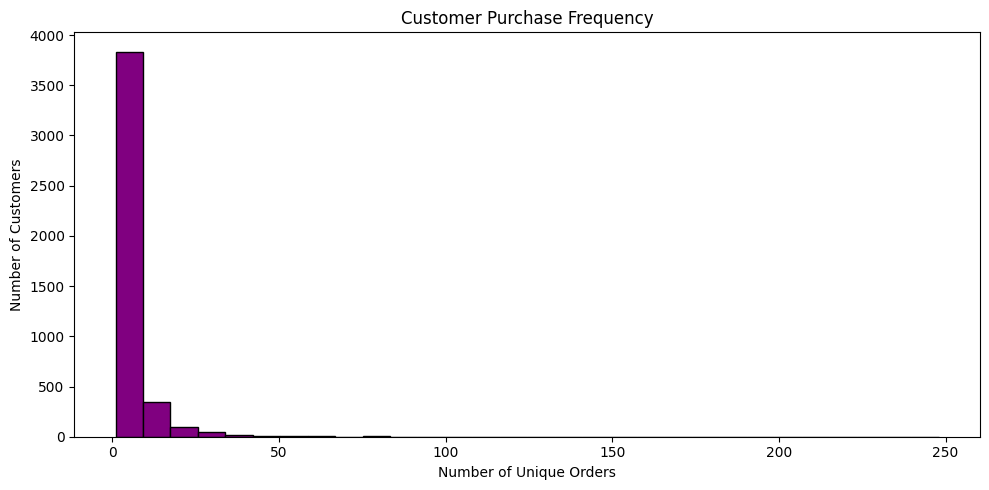

In [61]:
customer_orders = df.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(10, 5))
plt.hist(customer_orders, bins=30, color='purple', edgecolor='black')
plt.title("Customer Purchase Frequency")
plt.xlabel("Number of Unique Orders")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()
